In [1]:
save_name = 'ResNet34_Pretrained_Oversample_L2_Sum_PosWeight_12_Targets'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_PreTrained

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
out_channels=12
net_kwargs = {'layers':34, 'drop_out_precent':.5, 'out_channels':out_channels} #18, 34, 50, 101, 152
net = ResNet_PreTrained(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 224, 224))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

          ResNet-125                 [-1, 1000]               0
          Linear-126                   [-1, 12]          12,012
ResNet_PreTrained-127                   [-1, 12]               0
Total params: 21,809,684
Trainable params: 21,809,684
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 96.30
Params size (MB): 83.20
Estimated Total Size (MB): 179.69
----------------------------------------------------------------


In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=64, 
                                     learning_rate=1e-5, 
                                     num_epochs=2,
                                     device=device, 
                                     net=net,
                                     image_width = 224, #We need to match size of ImageNet
                                     image_height = 224,
                                     use_positivity_weights=True,
                                     observation_min_count=150,
                                     loss_reduction='sum',
                                     l2_reg=1e-1,
                                     augPercent=.4,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'ResNet_PreTrained',
                                     net_kwargs = net_kwargs)

Total Oversampled Rows Added to Train: 75,885

Number of Training Images: 181,223
Number of Validation Images: 26,410

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum     5.520689
Cardiomegaly                   3.661805
Lung_Opacity                   1.064514
Lung_Lesion                    5.580595
Edema                          2.695261
Consolidation                  4.847978
Pneumonia                      8.618034
Atelectasis                    3.250668
Pneumothorax                   5.391669
Pleural_Effusion               1.537178
Pleural_Other                 10.223323
Fracture                       6.093710
dtype: float64

In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1777801.5110         
Time of Completion: 2020-08-03 02:27:10.411738          
Training Duration: 0:26:37.904449          
Validation Duration: 0:02:31.604569

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38874,67461,0.717986,0.413735,0.524964,0.799936,0.585093
4,Edema,49042,76036,0.730333,0.471053,0.572715,0.787363,0.571961
5,Consolidation,30989,62219,0.707606,0.352433,0.470518,0.800055,0.566597
7,Atelectasis,42634,75562,0.650326,0.366930,0.469153,0.718278,0.485139
9,Pleural_Effusion,71427,85332,0.702437,0.587974,0.640129,0.763755,0.675002



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,5851,0.560555,0.283199,0.376292,0.777263,0.330513
4,Edema,6098,10902,0.746638,0.417630,0.535647,0.785882,0.483309
5,Consolidation,1573,4003,0.289892,0.113915,0.163558,0.659532,0.103281
7,Atelectasis,4186,8009,0.432394,0.225996,0.296843,0.624967,0.223296
9,Pleural_Effusion,8859,10741,0.715656,0.590262,0.646939,0.808954,0.670092


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1177661.5534         
Time of Completion: 2020-08-03 02:56:00.375097          
Training Duration: 0:26:20.013534          
Validation Duration: 0:02:28.095751

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,38874,51297,0.819108,0.620738,0.706258,0.920638,0.825041
4,Edema,49042,68855,0.813058,0.579101,0.676421,0.882525,0.750748
5,Consolidation,30989,43864,0.805802,0.569282,0.667201,0.919201,0.822073
7,Atelectasis,42634,63096,0.727870,0.491822,0.587005,0.842196,0.712100
9,Pleural_Effusion,71427,79216,0.793887,0.715828,0.752839,0.879275,0.834793



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2956,4167,0.503045,0.356851,0.417521,0.797455,0.373997
4,Edema,6098,9647,0.707773,0.447393,0.548238,0.794989,0.498590
5,Consolidation,1573,3433,0.265734,0.121759,0.167000,0.662971,0.104132
7,Atelectasis,4186,8653,0.468705,0.226742,0.305631,0.630723,0.224188
9,Pleural_Effusion,8859,10972,0.745457,0.601896,0.666028,0.823539,0.694592


Training Duration: 0:58:01.224689



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.255856
Hamming Loss,0.154669
Hamming Accuracy,0.845331
Combined Recall,0.634481
Combined Precision,0.523190
Combined F1,0.549183


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,27792,40897,0.814047,0.553195,0.658737,0.921149,0.819371
1,Cardiomegaly,38874,51297,0.819108,0.620738,0.706258,0.920638,0.825041
2,Lung_Opacity,87780,89895,0.690203,0.673964,0.681987,0.766230,0.760296
3,Lung_Lesion,27539,37874,0.842224,0.612399,0.709156,0.941498,0.859813
4,Edema,49042,68855,0.813058,0.579101,0.676421,0.882525,0.750748
5,Consolidation,30989,43864,0.805802,0.569282,0.667201,0.919201,0.822073
6,Pneumonia,18842,29252,0.870608,0.560782,0.682164,0.955870,0.869501
7,Atelectasis,42634,63096,0.727870,0.491822,0.587005,0.842196,0.712100
8,Pneumothorax,28353,43242,0.831235,0.545026,0.658370,0.928227,0.808028
9,Pleural_Effusion,71427,79216,0.793887,0.715828,0.752839,0.879275,0.834793


***** ROC *****


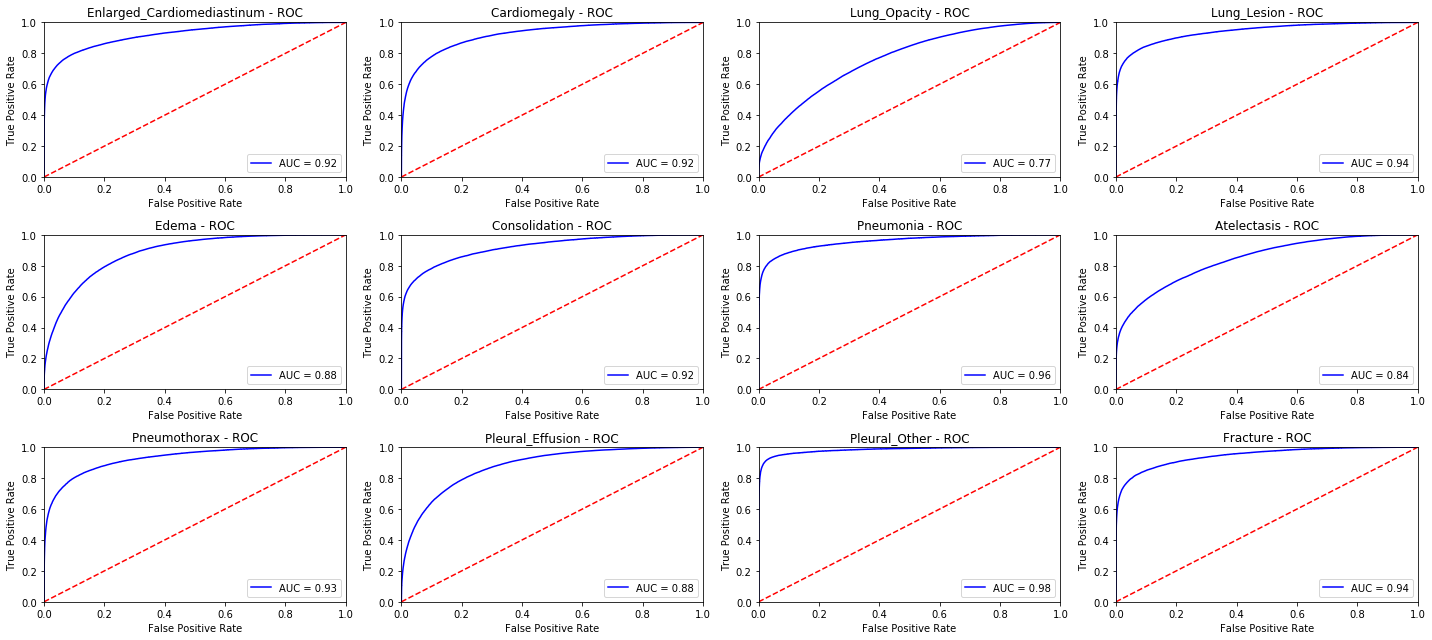

***** Precision / Recall *****


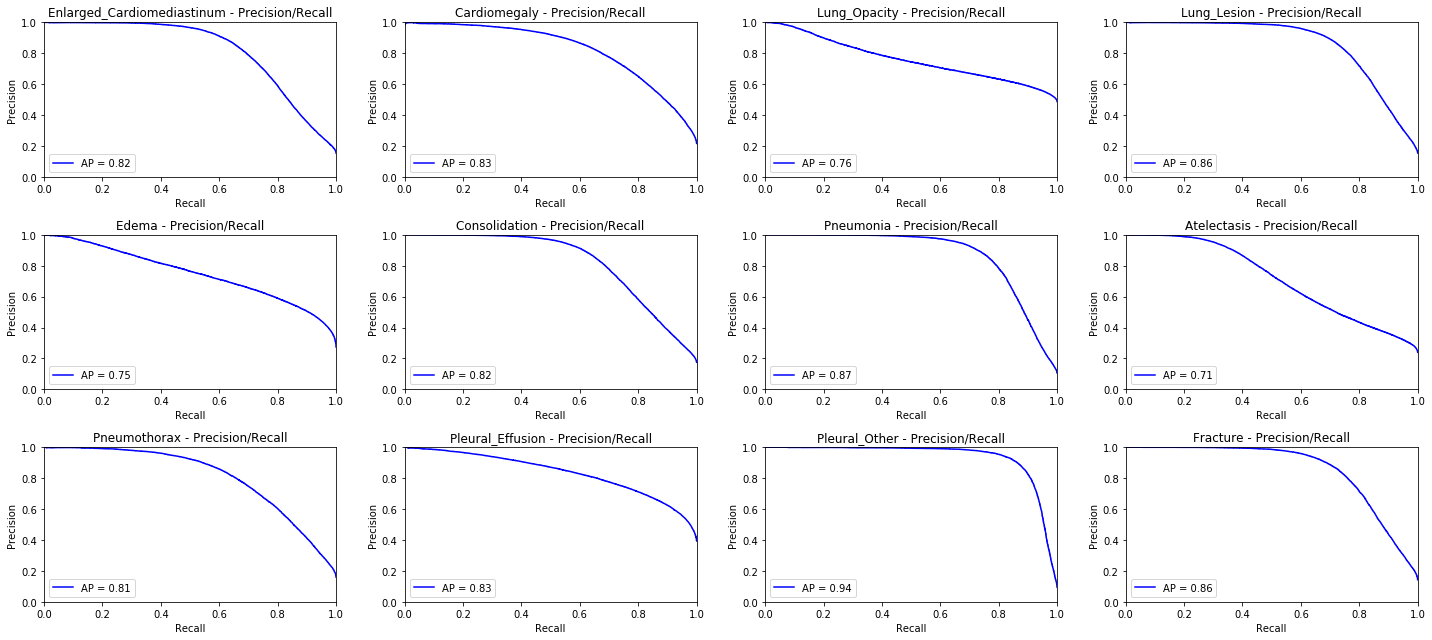


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.109693
Hamming Loss,0.181582
Hamming Accuracy,0.818418
Combined Recall,0.444164
Combined Precision,0.307509
Combined F1,0.337678


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1364,2073,0.188416,0.123975,0.149549,0.619422,0.093925
1,Cardiomegaly,2956,4167,0.503045,0.356851,0.417521,0.797455,0.373997
2,Lung_Opacity,11989,12571,0.617066,0.588497,0.602443,0.679493,0.601616
3,Lung_Lesion,1087,2647,0.263109,0.108047,0.153187,0.680805,0.091803
4,Edema,6098,9647,0.707773,0.447393,0.548238,0.794989,0.498590
5,Consolidation,1573,3433,0.265734,0.121759,0.167000,0.662971,0.104132
6,Pneumonia,680,2221,0.238235,0.072940,0.111686,0.675856,0.061291
7,Atelectasis,4186,8653,0.468705,0.226742,0.305631,0.630723,0.224188
8,Pneumothorax,2153,4568,0.537854,0.253503,0.344592,0.783401,0.288115
9,Pleural_Effusion,8859,10972,0.745457,0.601896,0.666028,0.823539,0.694592


***** ROC *****


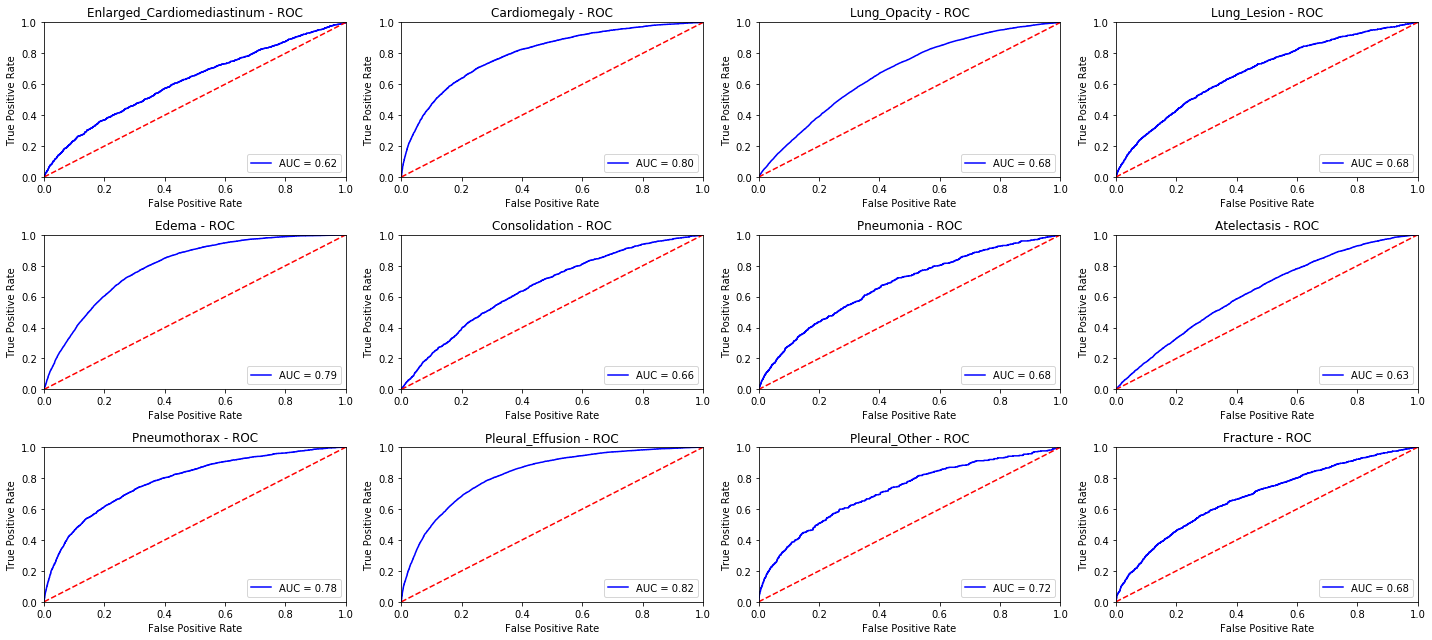

***** Precision / Recall *****


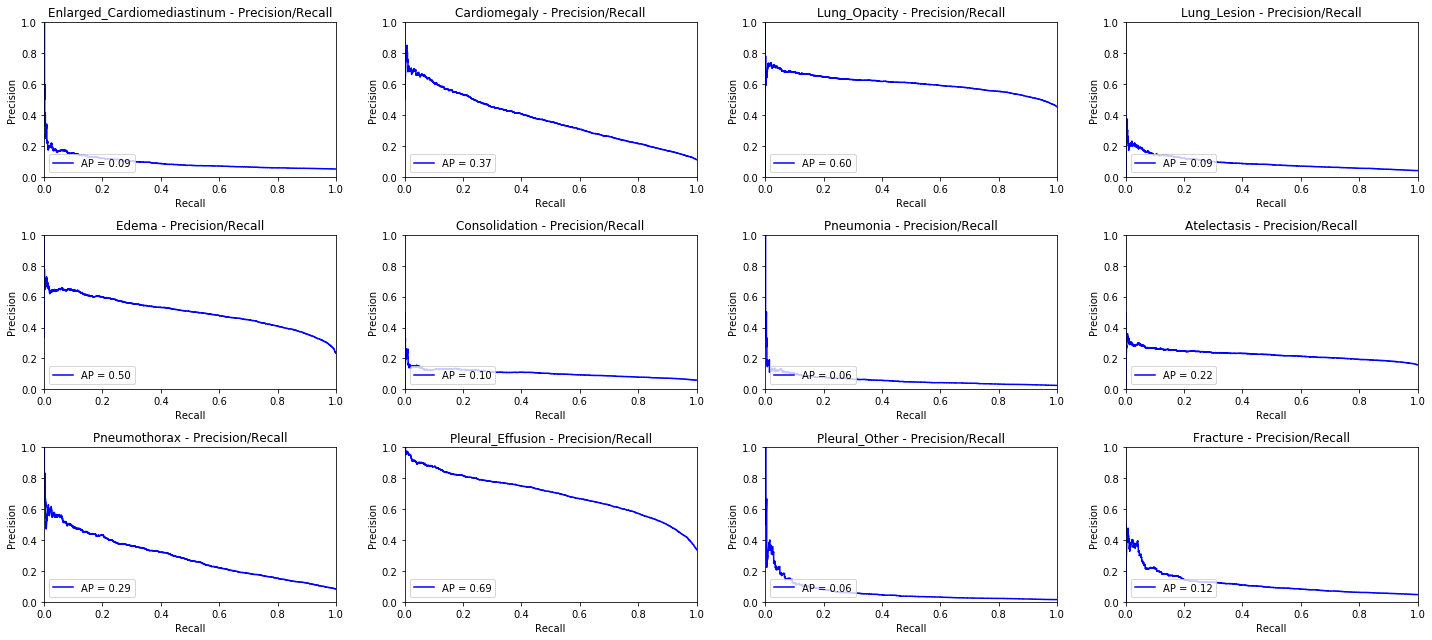

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


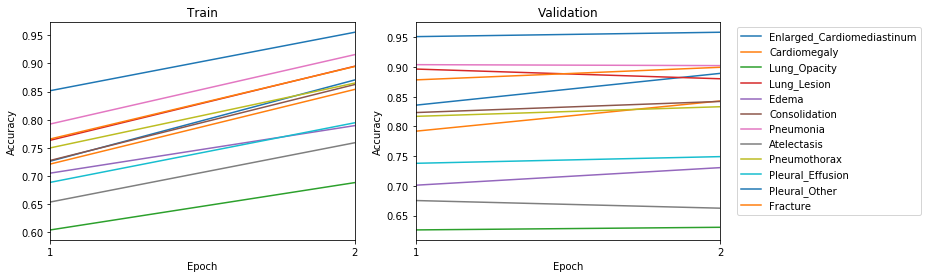


RECALL

▔▔▔


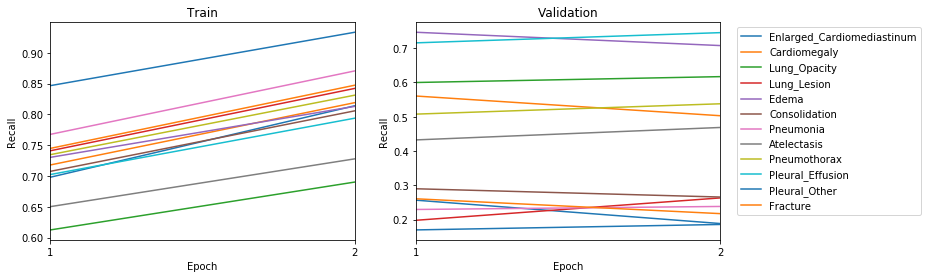


PRECISION

▔▔▔▔▔▔


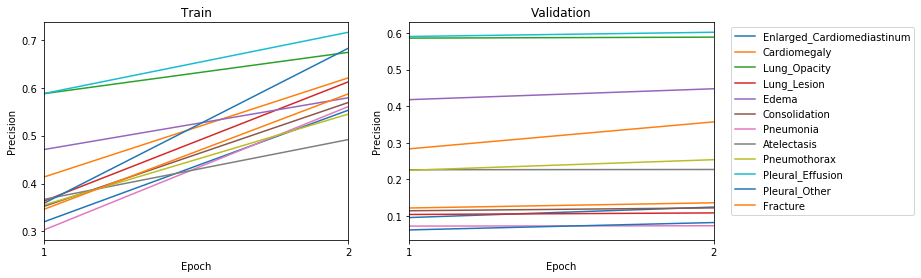


F1

▔


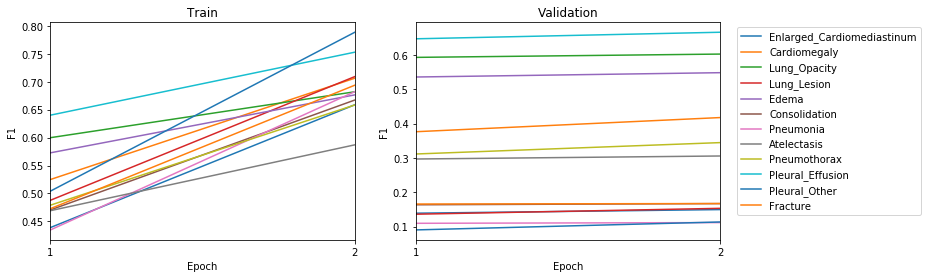


ROC AUC

▔▔▔▔


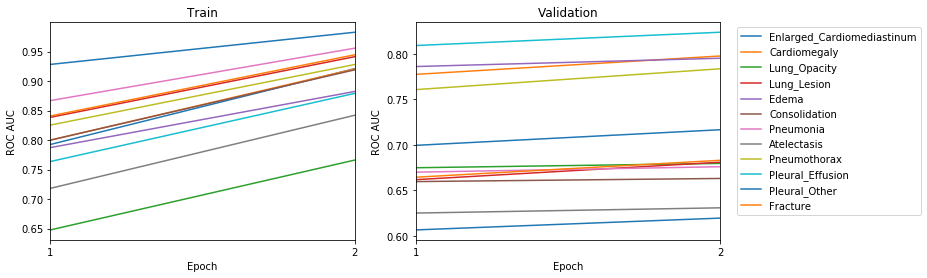


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


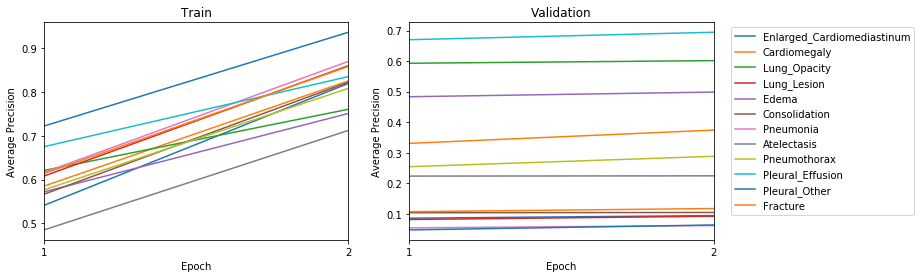

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()